In [9]:
import glob
import os
import numpy as np
import seaborn as sns
sb.set()
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [10]:
personas = pd.read_csv('..\\..\\Datos\\experiments\\personas_cotizacion6.csv', encoding = "ISO-8859-1")

In [11]:
personas.head()

,Unnamed: 0,is_apellido1,is_appelido2,is_celular,is_direccion,is_fnac,is_nombre,is_nombrecompleto,is_nrofam,is_profesion,...,nro_proyectos,profesion,rut,sexo,tipo_cliente,Altos del Valle,Edificio Urban 1470,San Andres Del Valle,Edificio Mil610,Edificio Junge
0,0,True,False,True,False,True,True,True,False,True,...,2.0,Abogado,000.000.000-0,Femenino,Natural,0.0,1.0,1.0,0.0,0.0
1,1,True,False,True,False,False,True,True,False,False,...,1.0,sin informacion,1.462.558-5,Masculino,Natural,0.0,0.0,0.0,1.0,0.0
2,2,True,False,True,False,False,True,True,False,False,...,1.0,sin informacion,10.000.513-1,Masculino,Natural,0.0,0.0,0.0,0.0,2.0
3,3,True,True,True,True,False,True,True,True,True,...,1.0,Médico,10.000.522-0,Masculino,Natural,0.0,0.0,0.0,0.0,2.0
4,4,True,True,True,False,False,True,True,False,False,...,1.0,sin informacion,10.005.853-7,Femenino,Natural,0.0,0.0,0.0,0.0,2.0


In [12]:
personas.drop(['Unnamed: 0'],axis=1, inplace=True)
personas.columns

Index(['is_apellido1', 'is_appelido2', 'is_celular', 'is_direccion', 'is_fnac',
       'is_nombre', 'is_nombrecompleto', 'is_nrofam', 'is_profesion',
       'is_recontacto', 'is_telefono', 'loc_comuna', 'loc_provincia',
       'loc_region', 'max_rango_edad', 'mean_cot_bod', 'mean_cot_depto',
       'mean_cot_esta', 'mean_cot_estu', 'medio_inicial', 'negocio',
       'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta', 'nro_cot_estu',
       'nro_proyectos', 'profesion', 'rut', 'sexo', 'tipo_cliente',
       'Altos del Valle', 'Edificio Urban 1470', 'San Andres Del Valle',
       'Edificio Mil610', 'Edificio Junge'],
      dtype='object')

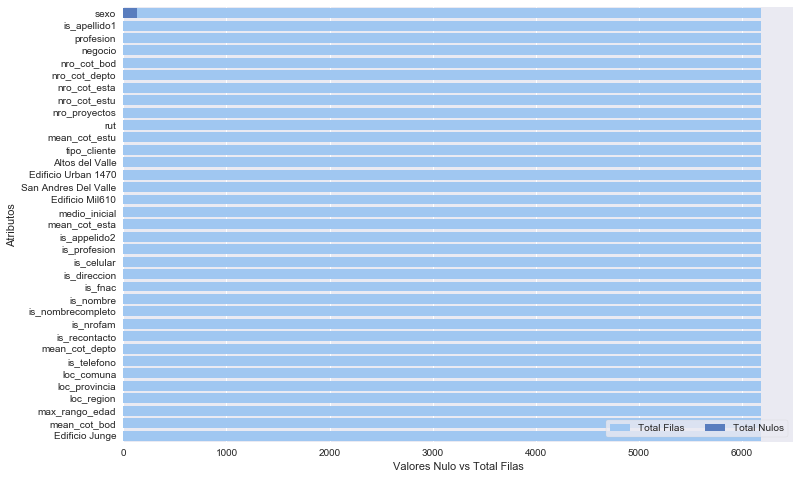

In [20]:
df = personas.copy()
df.replace(['Sin Información'], np.nan, inplace=True)

null_columns = df.columns[df.isnull().any()]
nulos = df[null_columns].isnull().sum()

#view all columns with its null count
null_columns = df.columns
null_df =  df.shape[0] - df.count()

null_df = pd.DataFrame({'Total':null_df,'Etiquetas':null_columns})

columnas = null_columns.copy()
filas = [df.shape[0]] * len(null_columns)

totales = pd.DataFrame({'Total':filas,'Etiquetas':columnas})

f, ax = plt.subplots(figsize=(12, 8))

sb.set_color_codes("pastel")
sb.barplot(data=totales.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Filas")

sb.set_color_codes("muted")
sb.barplot(data=null_df.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Nulos")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Atributos", xlabel="Valores vs Total Filas")
# sb.despine(left=True, bottom=True)
f.savefig("..\\results\\cot_all_attributes_clean.png")

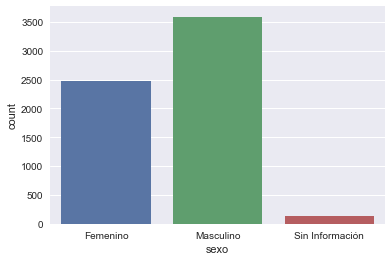

In [14]:
# sns.countplot(x="sexo",kind="bar", data=personas);
sns.countplot(x="sexo", data=personas)

In [25]:
pp = personas[personas.sexo == 'Sin Información']
print(pp['rut'].values)

['10.281.990-K' '11.495.487-K' '11.678.193-K' '11.678.839-K'
 '11.899.423-K' '11.901.896-K' '11.902.644-K' '12.180.641-K'
 '12.302.222-K' '12.329.033-K' '12.554.553-K' '12.589.268-K'
 '12.796.159-K' '12.917.398-K' '13.103.909-4' '13.133.359-6'
 '13.137.819-K' '13.145.693-K' '13.311.341-K' '13.325.708-K'
 '13.390.655-K' '13.413.569-9' '13.605.449-K' '13.724.355-5'
 '13.724.922-7' '13.725.192-2' '13.725.533-2' '13.725.607-k'
 '13.818.692-K' '13.966.331-1' '14.060.164-4' '14.072.047-K'
 '14.202.716-K' '14.273.401-K' '14.297.276-K' '14.359.960-5'
 '14.404.410-K' '14.549.530-K' '14.616.529-K' '15.157.808-K'
 '15.591.825-K' '15.646.709-K' '15.677.880-4' '15.753.102-7'
 '15.781.110-K' '15.855.369-9' '15.916.611-8' '15.999.189-6'
 '16.011.097-K' '16.036.374-0' '16.038.123-K' '16.224.678-K'
 '16.282.533-K' '16.460.747-K' '16.598.269-K' '16.607.908-K'
 '16.762.139-9' '16.764.497-K' '17.043.854-K' '17.159.006-K'
 '17.196.032-0' '17.199.294-K' '17.206.244-1' '17.321.951-6'
 '17.345.290-K' '17.346.

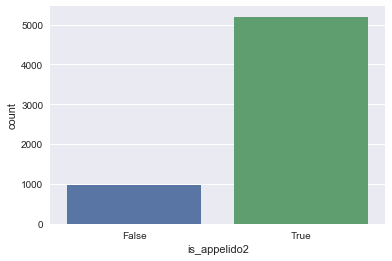

In [18]:
sns.countplot(x="is_appelido2", data=personas)

In [19]:
personas['Edificio Urban 1470'].nunique()

14

6184


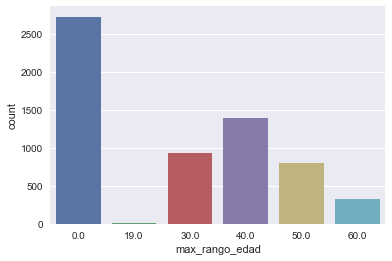

In [30]:
print(personas['Edificio Urban 1470'].replace('Sin Información', np.nan).isnull().count())
sns.countplot(x="max_rango_edad", data=personas)

In [36]:
import chile_rut
import re

def val_rut(x):
    x = str(x)
    if len(x) == 0:
        return False
    x = re.sub('[.|!@#$]', '', x)
    
    if len(x.split('-')) >= 2:
        return chile_rut.validate_rut(x)
    else:
        x = x[:-1] + '-' + x[-1]
        return chile_rut.validate_rut(x)

def clean_rut(x):
    x = str(x)
    if len(x) == 0:
        return False
    x = re.sub('[.|!@#$]', '', x)
    
    if len(x.split('-')) >= 2:
        return x
    else:
        x = x[:-1] + '-' + x[-1]
        return x
    
# cot_mod['Clean Rut'] = [clean_rut(x) for x in cot_mod['RUT'].values]
personas['Valid Rut'] = [val_rut(x) for x in personas['rut'].values]
p_rut_invalid = personas[personas['Valid Rut'] == False]
print(p_rut_invalid.shape[0])
print(p_rut_invalid['rut'].tolist())

44
['10.117.065-3', '10.658.228-6', '12.207.150-0', '12.844.757-k', '13.103.909-4', '13.133.359-6', '13.413.569-9', '13.508.090-4', '13.941.422-8', '13.966.331-1', '14.030.274-6', '14.060.164-4', '14.353.185-1', '14.359.960-5', '15.516.786-8', '15.677.880-4', '15.753.102-7', '15.779.609-6', '15.780.469-K', '15.855.369-9', '15.916.611-8', '15.999.189-6', '16.036.374-0', '16.134.407-7', '16.546.158-2', '16.620.489-6', '16.762.139-9', '17.206.244-1', '17.321.951-6', '17.346.561-1', '17.540.221-9', '17.896.434-2', '19.457.385-6', '22.949.606-7', '4.379.650-4', '5.663.292-k', '6.545.903-0', '618.053-5', '7.321.289-5', '7.879.943-1', '8.272.869-5', '8.495.983-3', '8.739.036-9', '955.952-4']
